## Project Week03

Yilun Wu (yw528)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

### Problem 1

In [2]:
# Read data from csv file
dailyReturn = pd.read_csv('DailyReturn.csv', index_col=0)
dailyReturn

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
44606.0,-0.003269,0.001423,-0.000136,0.012222,0.018326,0.009260,0.008723,-0.008426,0.013278,-0.015228,...,-0.013455,-0.008396,-0.005559,0.000520,-0.015466,-0.023272,-0.004768,-0.008806,-0.009122,-0.010335
44607.0,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028571,0.013237
44608.0,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,-0.001739,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025983
44609.0,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,-0.006653,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030856,-0.031925,-0.033380,-0.028763
44610.0,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,0.003987,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44960.0,-0.010629,0.024400,-0.023621,-0.084315,0.009083,-0.027474,-0.032904,-0.011866,-0.028053,-0.010742,...,-0.004694,-0.011251,-0.001277,-0.002677,0.038211,0.004134,0.002336,-0.008916,-0.005954,0.001617
44963.0,-0.006111,-0.017929,-0.006116,-0.011703,0.025161,-0.017942,-0.016632,-0.002520,-0.000521,-0.000259,...,-0.014451,0.003945,0.001066,-0.007102,0.022012,0.021826,-0.041181,0.005106,-0.009782,-0.004595
44964.0,0.013079,0.019245,0.042022,-0.000685,0.010526,0.046064,0.044167,0.029883,0.051401,0.014720,...,-0.000368,-0.016473,-0.008518,0.019544,-0.003590,-0.001641,0.003573,0.001451,0.008669,-0.003618
44965.0,-0.010935,-0.017653,-0.003102,-0.020174,0.022763,-0.076830,-0.074417,-0.042741,0.001443,-0.014346,...,-0.008469,-0.004456,-0.001289,-0.018009,-0.004416,0.002819,-0.015526,0.004106,-0.015391,0.009363


In [3]:
# Routine for calculating an exponentially weighted covariance matrix

def compute_ew_cov_matrix(data, _lambda):
    # first compute the normalized weights (W_{t-n}, ..., W_{t-1}) for a certain lambda
    n = data.shape[0]
    weights = np.zeros(n)
    for i in range(1, n+1): weights[i-1] = (1-_lambda)* (_lambda ** (i-1))
    weights = (weights/sum(weights))[::-1]

    # then compute the covariance matrix with weights
    diff = (data-data.mean()).to_numpy() # (X_{t-i}-\mu_x) from t-n to t-1 (topmost row is t-n, bottommost row is t-1)
    weights = np.diag(weights)
    return ((weights@diff).T)@diff

# use λ=0.97 since Risk Metrics research found that across a number of asset classes, λ=0.97 was the best value.
cov_matrix = compute_ew_cov_matrix(dailyReturn, 0.97)
print(cov_matrix)
print(cov_matrix.shape)

[[1.55382269e-04 2.09647082e-04 2.34621476e-04 ... 2.09131805e-04
  1.60236470e-04 6.30835084e-05]
 [2.09647082e-04 4.20670357e-04 3.20731274e-04 ... 2.86261481e-04
  2.01070219e-04 6.38376883e-05]
 [2.34621476e-04 3.20731274e-04 4.99230102e-04 ... 2.96918713e-04
  1.92369511e-04 3.85098812e-05]
 ...
 [2.09131805e-04 2.86261481e-04 2.96918713e-04 ... 7.15800762e-04
  2.13314178e-04 6.43298058e-05]
 [1.60236470e-04 2.01070219e-04 1.92369511e-04 ... 2.13314178e-04
  3.25441366e-04 7.25937608e-05]
 [6.30835084e-05 6.38376883e-05 3.85098812e-05 ... 6.43298058e-05
  7.25937608e-05 1.70423991e-04]]
(100, 100)


/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/wuyilun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


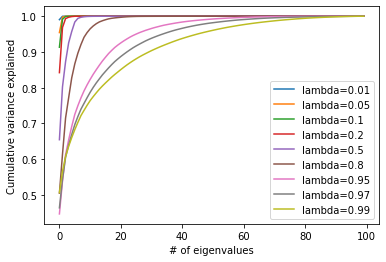

In [4]:
# Vary λ ∈ (0, 1)
lambdas = [0.01, 0.05, 0.1, 0.2, 0.5, 0.8, 0.95, 0.97, 0.99]

# Use PCA and plot the cumulative variance explained by each eigenvalue for each λ chosen.
def PCA(EWCM):
    eigenvalue, eigenvector = np.linalg.eig(EWCM)
    valueVectorPairs = sorted(list(zip(eigenvalue, eigenvector)), key=lambda p:p[0], reverse=True)
    eigenvalue = [p[0] for p in valueVectorPairs]
    eigenvector = [p[1] for p in valueVectorPairs]
    varExplained = eigenvalue/np.sum(eigenvalue)
    cumVarExplained = np.cumsum(varExplained)
    return cumVarExplained

for _lambda in lambdas:
    cum = PCA(compute_ew_cov_matrix(dailyReturn, _lambda))
    plt.plot(np.arange(0, dailyReturn.shape[1]), cum, label=f'lambda={_lambda}')

plt.xlabel("# of eigenvalues")
plt.ylabel("Cumulative variance explained")
plt.legend()
plt.show()

### Problem 2

In [5]:
# Original chol_psd() and near_psd() function code in Julia from the course repo
'''
# Cholesky that assumes PSD
function chol_psd!(root,a)
    n = size(a,1)
    #Initialize the root matrix with 0 values
    root .= 0.0

    #loop over columns
    for j in 1:n
        s = 0.0
        #if we are not on the first column, calculate the dot product of the preceeding row values.
        if j>1
            s =  root[j,1:(j-1)]'* root[j,1:(j-1)]
        end
  
        #Diagonal Element
        temp = a[j,j] .- s
        if 0 >= temp >= -1e-8
            temp = 0.0
        end
        root[j,j] =  sqrt(temp);

        #Check for the 0 eigan value.  Just set the column to 0 if we have one
        if 0.0 == root[j,j]
            root[j,(j+1):n] .= 0.0
        else
            #update off diagonal rows of the column
            ir = 1.0/root[j,j]
            for i in (j+1):n
                s = root[i,1:(j-1)]' * root[j,1:(j-1)]
                root[i,j] = (a[i,j] - s) * ir 
            end
        end
    end
end
'''

'''
# Near PSD Matrix
function near_psd(a; epsilon=0.0)
    n = size(a,1)

    invSD = nothing
    out = copy(a)

    #calculate the correlation matrix if we got a covariance
    if count(x->x ≈ 1.0,diag(out)) != n
        invSD = diagm(1 ./ sqrt.(diag(out)))
        out = invSD * out * invSD
    end

    #SVD, update the eigen value and scale
    vals, vecs = eigen(out)
    vals = max.(vals,epsilon)
    T = 1 ./ (vecs .* vecs * vals)
    T = diagm(sqrt.(T))
    l = diagm(sqrt.(vals))
    B = T*vecs*l
    out = B*B'

    #Add back the variance
    if invSD !== nothing 
        invSD = diagm(1 ./ diag(invSD))
        out = invSD * out * invSD
    end
    return out
end
'''

"\n# Near PSD Matrix\nfunction near_psd(a; epsilon=0.0)\n    n = size(a,1)\n\n    invSD = nothing\n    out = copy(a)\n\n    #calculate the correlation matrix if we got a covariance\n    if count(x->x ≈ 1.0,diag(out)) != n\n        invSD = diagm(1 ./ sqrt.(diag(out)))\n        out = invSD * out * invSD\n    end\n\n    #SVD, update the eigen value and scale\n    vals, vecs = eigen(out)\n    vals = max.(vals,epsilon)\n    T = 1 ./ (vecs .* vecs * vals)\n    T = diagm(sqrt.(T))\n    l = diagm(sqrt.(vals))\n    B = T*vecs*l\n    out = B*B'\n\n    #Add back the variance\n    if invSD !== nothing \n        invSD = diagm(1 ./ diag(invSD))\n        out = invSD * out * invSD\n    end\n    return out\nend\n"

In [6]:
# chol_psd() and near_psd() function in python
def chol_psd(a):
    n = a.shape[0]
    # Initialize the root matrix with 0 values
    root = np.zeros((n, n))

    # loop over columns
    for j in range(n):
        s = 0.0
        # if we are not on the first column, calculate the dot product of the preceeding row values.
        if j > 0: s = root[j, :j].T@root[j, :j]
        # Diagonal Element
        temp = a[j, j]-s
        if -1e-8 <= temp <= 0: temp = 0.0
        root[j, j] = np.sqrt(temp);

        # Check for the 0 eigen value.  Just set the column to 0 if we have one
        if root[j, j] == 0.0:
            root[j, (j+1):n] = 0.0
        else:
            # update off diagonal rows of the column
            ir = 1.0/root[j, j]
            for i in range(j+1, n):
                s = root[i, :j].T@root[j, :j]
                root[i, j] = (a[i, j]-s) * ir 
    return root

def near_psd(a, epsilon=0.0):
    n = a.shape[0]

    invSD = None
    out = a.copy()

    # calculate the correlation matrix if we got a covariance
    if np.count_nonzero(np.diag(out) == 1.0) != n:
        invSD = np.diag(1.0/np.sqrt(np.diag(out)))
        out = invSD@out@invSD

    # SVD, update the eigen value and scale
    vals, vecs = np.linalg.eigh(out)
    vals = np.maximum(vals, epsilon)
    T = 1.0 / (np.square(vecs)@vals)
    T = np.diag(np.sqrt(T))
    l = np.diag(np.sqrt(vals))
    B = T@vecs@l
    out = B@(B.T)

    # Add back the variance
    if invSD is not None: 
        invSD = np.diag(1.0/np.diag(invSD))
        out = invSD@out@invSD
    return out

In [7]:
# Implement Higham’s 2002 nearest psd correlation function.
def proj_u(a):
    np.fill_diagonal(a, 1.0)
    return a

def proj_s(a, epsilon, weight):
    a = np.sqrt(weight)@a@np.sqrt(weight)
    vals, vecs = np.linalg.eigh(a)
    vals = np.array([max(i, epsilon) for i in vals])
    return np.sqrt(weight)@vecs@np.diag(vals)@(vecs.T)@np.sqrt(weight)

def Frobenius_norm(a, b):
    return np.sqrt(np.sum((a-b)**2))

def higham_near_psd(a, epsilon=1e-8, tol=1e-8, max_iter=1000, weight=None):
    n = a.shape[0]
    if weight is None: weight = np.identity(n)

    invSD = None
    gamma = np.inf
    y = a.copy()
    y0 = a.copy()
    ds = np.zeros_like(y)

    if np.count_nonzero(np.diag(y) == 1.0) != n:
        invSD = np.diag(1.0/np.sqrt(np.diag(out)))
        out = invSD@out@invSD

    for _ in range(max_iter):
        r = y-ds
        x = proj_s(r, epsilon, weight)
        s = x-r
        y = proj_u(x)
        norm = Frobenius_norm(y, y0)
        minEigVal = np.real(np.linalg.eigvals(y)).min()
        if abs(norm-gamma) < tol and minEigVal > -epsilon:
            break
        gamma = norm
    
    if invSD is not None:
        invSD = np.diag(1.0/np.diag(invSD))
        y = invSD@y@invSD

    return y

In [8]:
# Generate a non-psd correlation matrix that is 500x500
n = 500
corr = np.zeros((n, n))
corr.fill(0.9)
for i in range(n): corr[i, i] = 1.0
corr[0, 1] = 0.7357
corr[1, 0] = 0.7357
corr

array([[1.    , 0.7357, 0.9   , ..., 0.9   , 0.9   , 0.9   ],
       [0.7357, 1.    , 0.9   , ..., 0.9   , 0.9   , 0.9   ],
       [0.9   , 0.9   , 1.    , ..., 0.9   , 0.9   , 0.9   ],
       ...,
       [0.9   , 0.9   , 0.9   , ..., 1.    , 0.9   , 0.9   ],
       [0.9   , 0.9   , 0.9   , ..., 0.9   , 1.    , 0.9   ],
       [0.9   , 0.9   , 0.9   , ..., 0.9   , 0.9   , 1.    ]])

In [9]:
# Use near_psd() and Higham’s method to fix the matrix. Confirm the matrix is now PSD.
def is_psd(a):
    return np.all(np.linalg.eigvals(a) >= 0)

print(f"Original matrix is positive semi-definite: {is_psd(corr)}")
print(f"After fixing using near_psd(), the matrix is now positive semi-definite: {is_psd(near_psd(corr, epsilon=1e-8))}")
print(f"After fixing using Higham’s method, the matrix is now positive semi-definite: {is_psd(higham_near_psd(corr))}")

Original matrix is positive semi-definite: False
After fixing using near_psd(), the matrix is now positive semi-definite: True
After fixing using Higham’s method, the matrix is now positive semi-definite: True


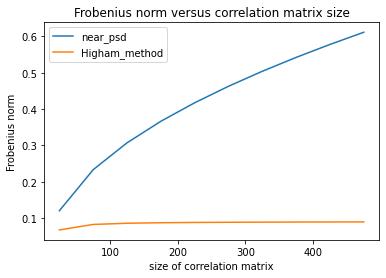

In [10]:
# Compare the results of both using the Frobenius Norm
ns = np.arange(25, 501, 50)
near_psd_norms = []
higham_method_norms = []
for n in ns:
    corr_n = corr[:n, :n]
    near_psd_norms.append(Frobenius_norm(corr_n, near_psd(corr_n)))
    higham_method_norms.append(Frobenius_norm(corr_n, higham_near_psd(corr_n)))

plt.plot(ns, near_psd_norms, label='near_psd')
plt.plot(ns, higham_method_norms, label='Higham_method')
plt.xlabel('size of correlation matrix')
plt.ylabel('Frobenius norm')
plt.title('Frobenius norm versus correlation matrix size')
plt.legend()
plt.show()

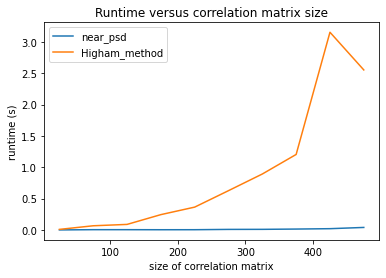

In [11]:
# Compare the runtime between the two
ns = np.arange(25, 501, 50)
near_psd_times = []
higham_method_times = []
for n in ns:
    corr_n = corr[:n, :n]

    startTime = time.time()
    near_psd(corr_n)
    endTime = time.time()
    near_psd_times.append(endTime-startTime)

    startTime = time.time()
    higham_near_psd(corr_n)
    endTime = time.time()
    higham_method_times.append(endTime-startTime)

plt.plot(ns, near_psd_times, label='near_psd')
plt.plot(ns, higham_method_times, label='Higham_method')
plt.xlabel('size of correlation matrix')
plt.ylabel('runtime (s)')
plt.title('Runtime versus correlation matrix size')
plt.legend()
plt.show()

### Problem 3

In [12]:
# Implement a multivariate normal simulation that allows for simulation directly from a covariance matrix 
# or using PCA with an optional parameter for % variance explained.
def multi_norm_sim(cov_matrix, num_samples, mean=0, var_explained=1.0, sim='direct'):
    if sim == 'direct':
        L = chol_psd(cov_matrix)
        normal_samples = np.random.normal(size=(cov_matrix.shape[0], num_samples))
        samples = (L@normal_samples).T+mean
        return samples
    elif sim == 'PCA':
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # filter out non-positive eigenvalues
        eigenvalues = eigenvalues[eigenvalues > 0]
        eigenvectors = eigenvectors[:, eigenvalues > 0]

        # sort the eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices] 
        eigenvectors = eigenvectors[:, sorted_indices]
        if var_explained == 1.0:
            var_explained = (np.cumsum(eigenvalues)/np.sum(eigenvalues))[-1]
        
        # find the number of principal components that explains the desired variance
        num_pc = np.where((np.cumsum(eigenvalues)/np.sum(eigenvalues))>= var_explained)[0][0]+1
        eigenvectors = eigenvectors[:,:num_pc]
        eigenvalues = eigenvalues[:num_pc]

        # simulate the samples
        normal_samples = np.random.normal(size=(num_pc, num_samples))
        L = eigenvectors@np.diag(np.sqrt(eigenvalues))
        samples = (L@normal_samples).T+mean
        return samples
    else:
        raise Exception("sim must be either 'direct' or 'PCA'")

In [13]:
# Create 4 different covariance matrices
def compute_ew_corr_pearson_var_cov_matrix(data, _lambda):
    # first compute the exponential weighted correlation matrix and compute the covariance matrix with pearson variance
    ew_cov_matrix = compute_ew_cov_matrix(data, _lambda) # from problem 1
    ew_var = np.diag(ew_cov_matrix) 
    ew_corr = np.diag(1.0/np.sqrt(ew_var))@ew_cov_matrix@(np.diag(1.0/np.sqrt(ew_var)).T)
    pearson_var = np.var(data)
    return np.diag(np.sqrt(pearson_var))@ew_corr@(np.diag(np.sqrt(pearson_var)).T)

def compute_pearson_corr_ew_var_cov_matrix(data, _lambda):
    # first compute the exponential weighted variance and compute the covariance matrix with pearson correlation matrix
    ew_cov_matrix = compute_ew_cov_matrix(data, _lambda) # from problem 1
    ew_var = np.diag(ew_cov_matrix) 
    pearson_corr = np.corrcoef(data.T)
    return np.diag(np.sqrt(ew_var))@pearson_corr@(np.diag(np.sqrt(ew_var)).T)

pearson_corr_pearson_var_cov_matrix = np.cov(dailyReturn, rowvar=False)
ew_corr_pearson_var_cov_matrix = compute_ew_corr_pearson_var_cov_matrix(dailyReturn, 0.97)
pearson_corr_ew_var_cov_matrix = compute_pearson_corr_ew_var_cov_matrix(dailyReturn, 0.97)
ew_corr_ew_var_cov_matrix = compute_ew_cov_matrix(dailyReturn, 0.97) # From problem 1
if not np.allclose(pearson_corr_pearson_var_cov_matrix, ew_corr_pearson_var_cov_matrix) and \
    not np.allclose(ew_corr_pearson_var_cov_matrix, pearson_corr_ew_var_cov_matrix) and \
    not np.allclose(pearson_corr_ew_var_cov_matrix, ew_corr_ew_var_cov_matrix):
    print("The 4 covariance matrices are all different from each other.")

The 4 covariance matrices are all different from each other.


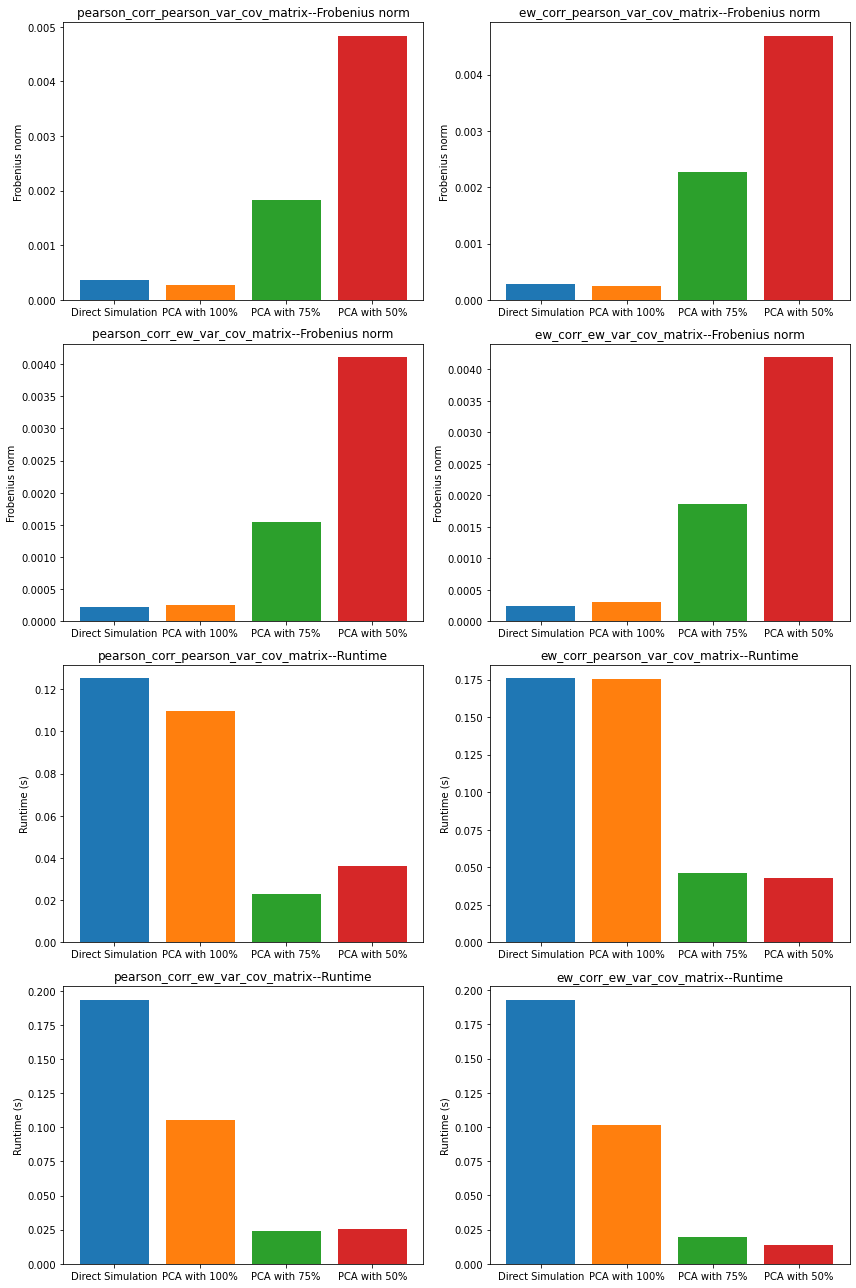

In [14]:
# Compare the simulated covariance to it’s input matrix using the Frobenius Norm
# and compare the runtime for each simulation 

DRAWS = 25000
cov_matrices = [pearson_corr_pearson_var_cov_matrix, ew_corr_pearson_var_cov_matrix, pearson_corr_ew_var_cov_matrix, ew_corr_ew_var_cov_matrix]
cov_matrices_names = ['pearson_corr_pearson_var_cov_matrix', 'ew_corr_pearson_var_cov_matrix', 'pearson_corr_ew_var_cov_matrix', 'ew_corr_ew_var_cov_matrix']
fig, axs = plt.subplots(4, 2, figsize=(12, 18))
axs = axs.flatten()
for i in range(len(cov_matrices)):
    cov_matrix = cov_matrices[i]
    cov_matrix_name = cov_matrices_names[i]

    startTime = time.time()
    data1 = multi_norm_sim(cov_matrix, DRAWS, sim='direct') # Direct Simulation
    endTime = time.time()
    time1 = endTime-startTime

    startTime = time.time()
    data2 = multi_norm_sim(cov_matrix, DRAWS, var_explained=1.0, sim='PCA') # PCA with 100% explained
    endTime = time.time()
    time2 = endTime-startTime

    startTime = time.time()
    data3 = multi_norm_sim(cov_matrix, DRAWS, var_explained=0.75, sim='PCA') # PCA with 75% explained
    endTime = time.time()
    time3 = endTime-startTime

    startTime = time.time()
    data4 = multi_norm_sim(cov_matrix, DRAWS, var_explained=0.5, sim='PCA') # PCA with 50% explained
    endTime = time.time()
    time4 = endTime-startTime

    runtimes = [time1, time2, time3, time4]

    # plotting Frobenius norm
    plt.sca(axs[i])
    plt.ylabel("Frobenius norm")
    plt.title(f"{cov_matrix_name}--Frobenius norm")
    plt.bar("Direct Simulation", Frobenius_norm(cov_matrix, np.cov(data1.T)))
    plt.bar("PCA with 100%", Frobenius_norm(cov_matrix, np.cov(data2.T)))
    plt.bar("PCA with 75%", Frobenius_norm(cov_matrix, np.cov(data3.T)))
    plt.bar("PCA with 50%", Frobenius_norm(cov_matrix, np.cov(data4.T)))

    # plotting runtime
    plt.sca(axs[i+4])  # shift to the next row
    plt.ylabel("Runtime (s)")
    plt.title(f"{cov_matrix_name}--Runtime")
    plt.bar("Direct Simulation", runtimes[0])
    plt.bar("PCA with 100%", runtimes[1])
    plt.bar("PCA with 75%", runtimes[2])
    plt.bar("PCA with 50%", runtimes[3])
plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()